In [ ]:
# /// script
# requires-python = ">=3.12"
# dependencies = [
#     "geopandas",
#     "h3",
#     "lonboard",
#     "matplotlib",
#     "palettable",
#     "pyarrow",
#     "sidecar",
# ]
# ///

# Kontur Global Population Data

This example will use the `H3Layer` with data from [Kontur's global population dataset](https://data.humdata.org/dataset/kontur-population-dataset-22km).

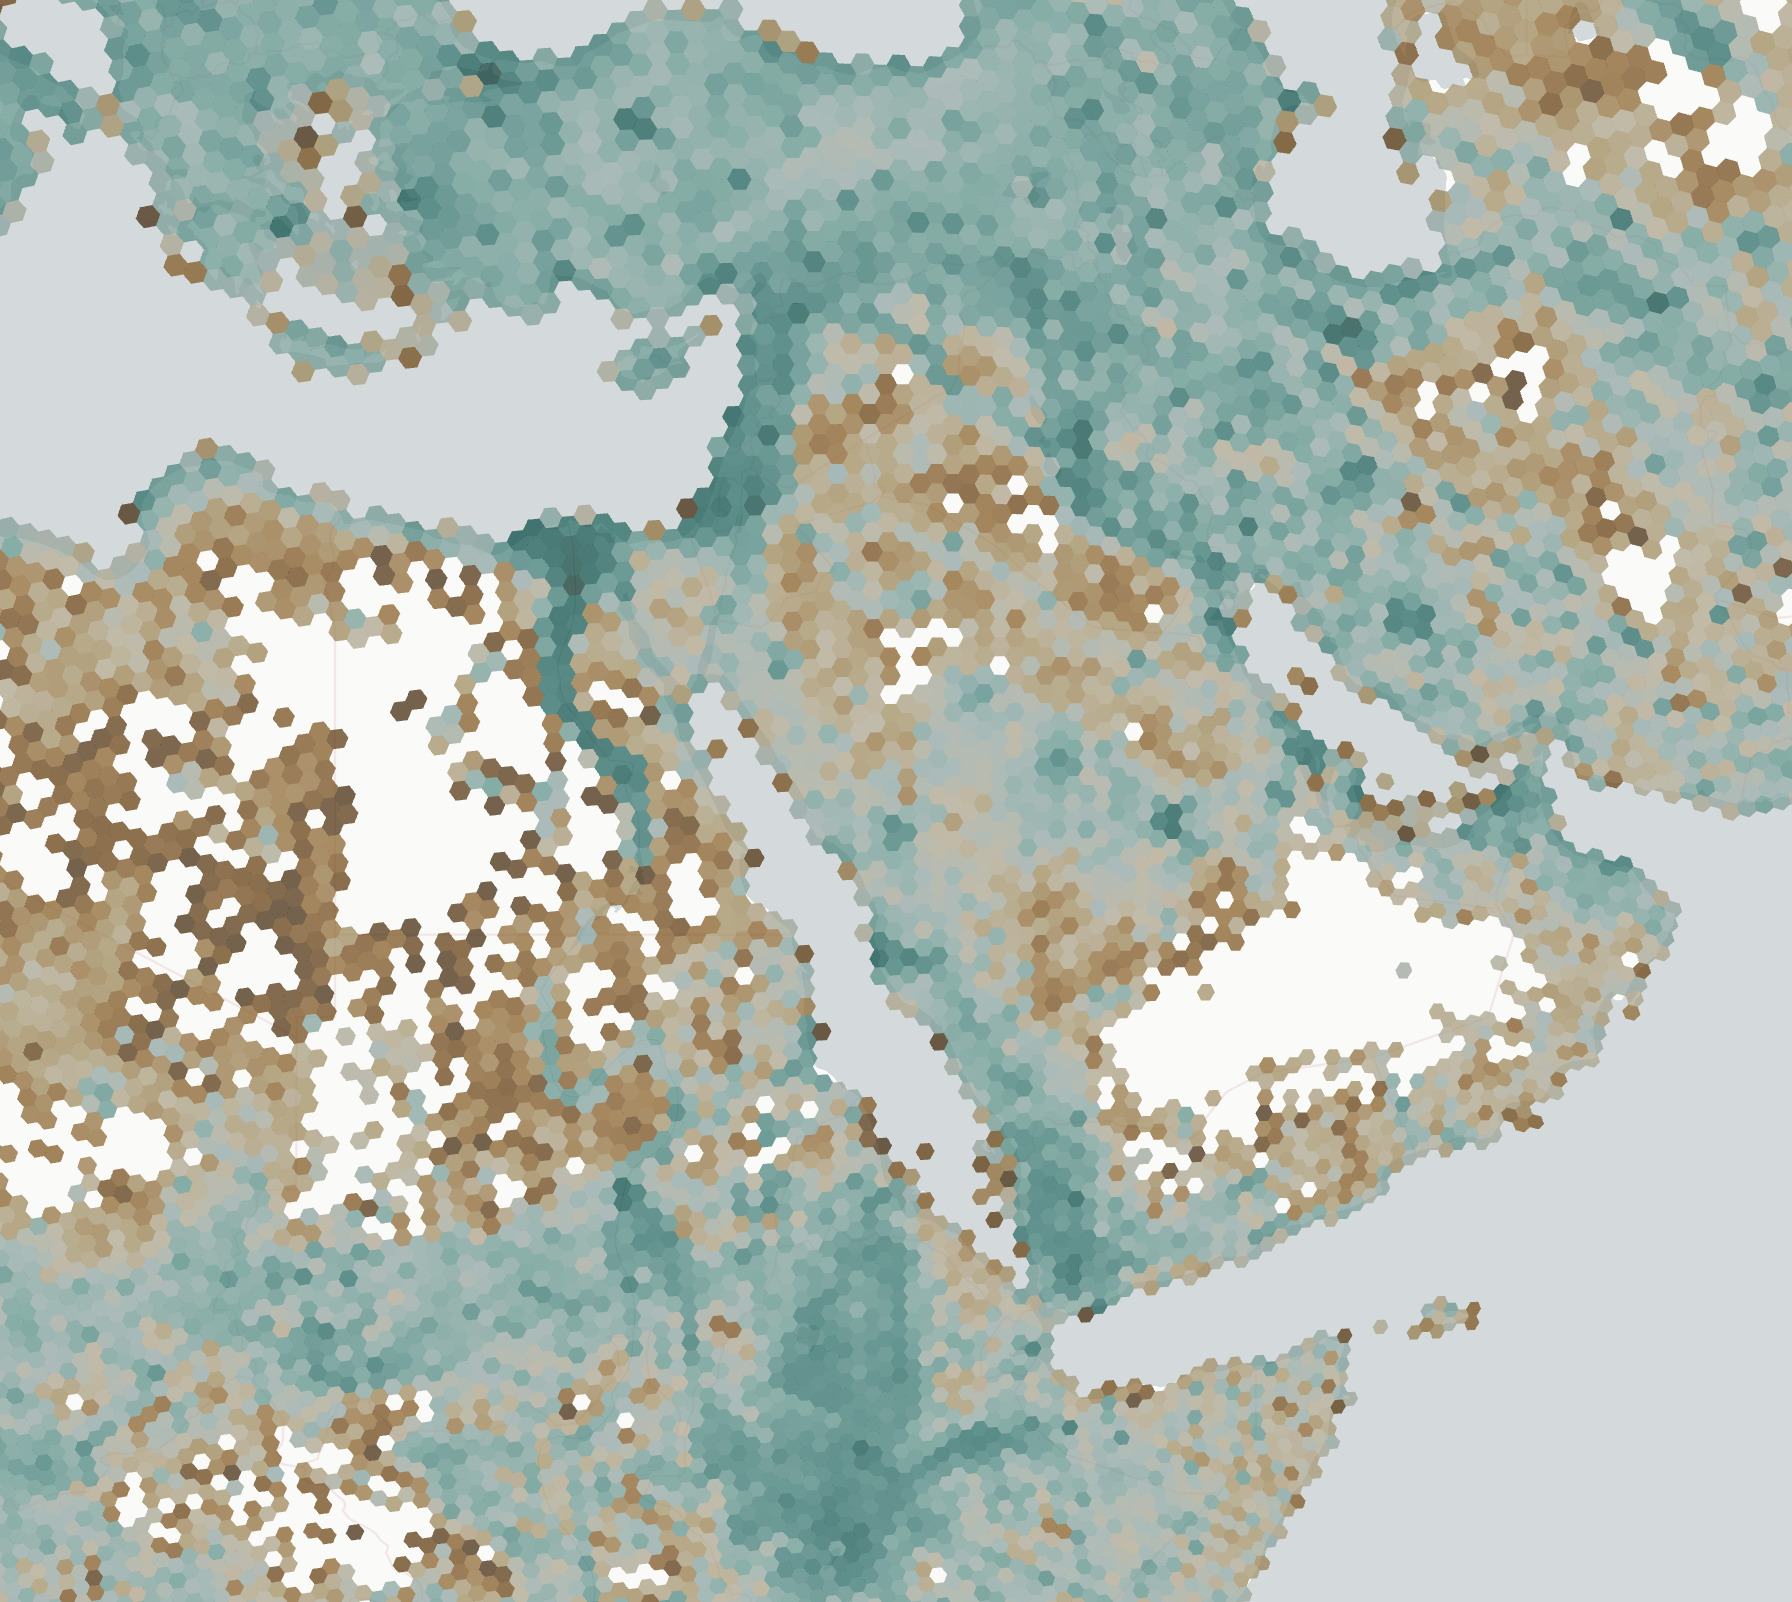

In [ ]:
import warnings

import geopandas as gpd
from matplotlib.colors import LogNorm
from palettable.colorbrewer.diverging import BrBG_10
from sidecar import Sidecar

from lonboard import H3HexagonLayer, Map
from lonboard.colormap import apply_continuous_cmap

We'll load this data directly 

In [ ]:
url = "https://geodata-eu-central-1-kontur-public.s3.eu-central-1.amazonaws.com/kontur_datasets/kontur_population_20231101_r4.gpkg.gz"

In [ ]:
# Wrap with GDAL's virtual file prefixes
vsipath = f"/vsigzip//vsicurl/{url}"

We use `warnings.catch_warnings` to avoid the logging of GDAL not being able to find auxiliary files in the bucket.

In [ ]:
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="HTTP response code",
        category=RuntimeWarning,
    )
    gdf = gpd.read_file(vsipath, use_arrow=True)

We extract only the attribute columns in this case so that we render the h3 data directly, instead of rendering the polygon data.

This now gives us a plain pandas `DataFrame`, we no longer have a geometry in `df`.

In [ ]:
df = gdf[["h3", "population"]]

We create a color palette where the colormap is applied to the population values [logarithmically](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.LogNorm.html).

In [ ]:
pop = df["population"]
min_bound = pop.min()
max_bound = pop.max()
normalizer = LogNorm(min_bound, max_bound, clip=True)
normalized = normalizer(pop)

Create the map window for display:

In [ ]:
sidecar = Sidecar(anchor="split-right")

Finally we generate the layer and pass it into a map.

In [ ]:
layer = H3HexagonLayer.from_pandas(
    df,
    get_hexagon=df["h3"],
    get_fill_color=apply_continuous_cmap(normalized, BrBG_10, alpha=0.7),
)
m = Map(layer)
with sidecar:
    display(m)

Due to an upstream bug, you may temporarily need to move the map slightly for the data to show.